In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from tqdm.auto import tqdm

from definitive_dyn_indicators.utils.xtrack_engine import get_lhc_mask, xtrack_engine

In [2]:
OUTDIR = '../tmp'

In [3]:
samples = 3
n_turns = 10

extent = (0.1e-3, 1e-3)
x = np.linspace(*extent, samples)
xx, yy = np.meshgrid(x, x)
x_f = xx.flatten()
y_f = yy.flatten()
px_f = np.zeros_like(x_f)
py_f = np.zeros_like(x_f)

In [4]:
engine = xtrack_engine(context="OPENCL")


/home/camontan/anaconda3/lib/python3.8/site-packages/pyopencl/__init__.py:266: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


In [5]:
data_true = engine.track(x_f, px_f, y_f, py_f, n_turns*10)

In [6]:
engine = xtrack_engine(context="OPENCL")

In [7]:
data_half = engine.track(x_f, px_f, y_f, py_f, n_turns)

for i in tqdm(range(9)):
    with open(os.path.join(OUTDIR, 'engine.pkl'), 'wb') as f:
        pickle.dump(engine, f)

    with open(os.path.join(OUTDIR, 'engine.pkl'), 'rb') as f:
        engine = pickle.load(f)

    data_maybe = engine.keep_tracking(n_turns)


  0%|          | 0/9 [00:00<?, ?it/s]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


 11%|█         | 1/9 [00:04<00:39,  4.94s/it]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


 22%|██▏       | 2/9 [00:09<00:34,  4.97s/it]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


 33%|███▎      | 3/9 [00:14<00:29,  4.99s/it]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


 44%|████▍     | 4/9 [00:19<00:24,  4.93s/it]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


 56%|█████▌    | 5/9 [00:24<00:19,  4.90s/it]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


 67%|██████▋   | 6/9 [00:29<00:14,  4.89s/it]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


 78%|███████▊  | 7/9 [00:34<00:09,  4.89s/it]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


 89%|████████▉ | 8/9 [00:39<00:04,  4.94s/it]

Here!
after save partcles to dict...
convert
<class 'dict'>
Return?


100%|██████████| 9/9 [00:44<00:00,  4.90s/it]


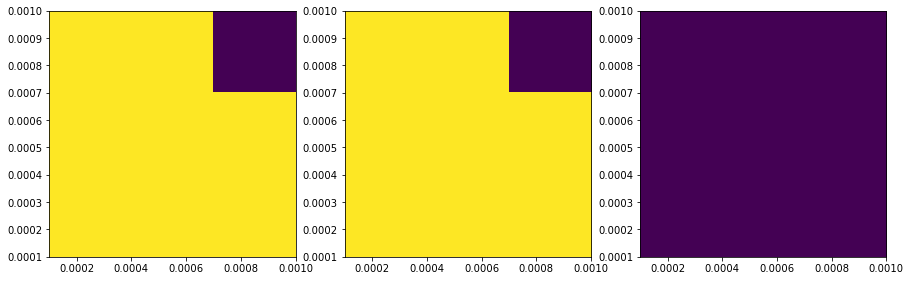

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(data_true[4].reshape(samples, samples),
           extent=extent + extent, origin='lower')
ax2.imshow(data_maybe[4].reshape(samples, samples),
           extent=extent + extent, origin='lower')
ax3.imshow((data_true[4]-data_maybe[4]).reshape(samples, samples),
           extent=extent + extent, origin='lower')


In [9]:
(data_true[4]-data_maybe[4]).reshape(samples, samples)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

/tmp/ipykernel_49763/3373771070.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.absolute((data_true[0]-data_maybe[0])/data_true[0])).reshape(samples, samples),


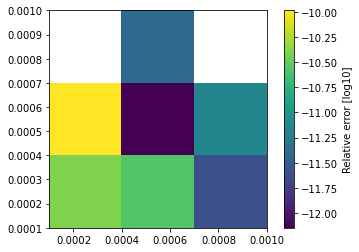

In [10]:
plt.figure()

plt.imshow(np.log10(np.absolute((data_true[0]-data_maybe[0])/data_true[0])).reshape(samples, samples),
           extent=extent + extent, origin='lower')

plt.colorbar(label="Relative error [log10]")